In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import seaborn as sns

def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn


# Import necessary modules
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import AdaBoostRegressor
from xgboost import XGBRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Lasso
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.inspection import permutation_importance

In [2]:
# all_datasets = ['manual_mc1', 'manual_tf3', 'manual_mnn1', 'manual_sys1', 'manual_stress2', 'user7zip', 'usercp2k', 'usercrypto', 'usergzip', 'userstream2', 'userfio', 'userramspeed', 'usertinymemb', 'userlinux', 'idle']
all_datasets = ['exp1model1','exp2model1','exp3model1','exp4model1','exp5model1','exp6model1','exp7app1model1','exp7app2model1','exp8app1model1','exp8app2model1','exp9app1model1','exp9app2model1','exp10app1model1','exp10app2model1','exp11app1model1','exp11app2model1', 'exp7model1', 'exp8model1', 'exp9model1', 'exp10model1', 'exp11model1', 'exp12model1', 'exp12app1model1', 'exp12app2model1', 'exp12model2', 'exp12app1model2', 'exp12app2model2', 'exp12app3model2', 'exp13model1', 'exp13app1model1', 'exp13app2model1', 'exp13model2', 'exp13app1model2', 'exp13app2model2', 'exp13app3model2', 'exp1app1model1', 'exp1app2model1', 'exp2app1model1', 'exp2app2model1', 'exp3app1model1', 'exp3app2model1', 'exp4app1model1', 'exp4app2model1', 'exp5app1model1', 'exp5app2model1', 'exp6app1model1', 'exp6app2model1', 'exp14model1', 'exp14app1model1', 'exp14app2model1', 'exp15model1', 'exp15app1model1', 'exp15app2model1', 'exp16model1', 'exp16app1model1', 'exp16app2model1', 'exp17model1', 'exp17app1model1', 'exp17app2model1', 'exp18model1', 'exp18app1model1', 'exp18app2model1']
df_all = {}
for i in all_datasets:
    if i.endswith('model1'):
        df_all[i.split('model1')[0]] = pd.read_csv("datasets/final-" + i + ".csv")
    else:
        df_all[i] = pd.read_csv("datasets/final-" + i + ".csv")
# df1 = pd.read_csv("datasets/final-mc.csv")
# df2 = pd.read_csv("datasets/final-tf.csv")
# df3 = pd.read_csv("datasets/final-mnn.csv")
# df4 = pd.read_csv("datasets/final-sys.csv")
# df5 = pd.read_csv("datasets/final-stress.csv")
# df1 = df1.loc[:, ~df1.columns.str.contains('^Unnamed')]
# df2 = df2.loc[:, ~df2.columns.str.contains('^Unnamed')]
# df3 = df3.loc[:, ~df3.columns.str.contains('^Unnamed')]
# df4 = df4.loc[:, ~df4.columns.str.contains('^Unnamed')]
# df5 = df5.loc[:, ~df5.columns.str.contains('^Unnamed')]
for test in df_all:
    df_all[test] = df_all[test].loc[:, ~df_all[test].columns.str.contains('^Unnamed')]
    df_all[test] = df_all[test][sorted(df_all[test].columns)]
    cols = list(df_all[test].columns.values)
    cols.pop(cols.index('power'))
    cols.pop(cols.index('pkg_pwr')) #Remove package power from list
    cols.pop(cols.index('ram_pwr')) #Remove RAM power from list
    df_all[test] = df_all[test][cols+['pkg_pwr', 'ram_pwr', 'power']]
    
    


In [3]:
sorted(list(df_all.keys()))

['exp1',
 'exp10',
 'exp10app1',
 'exp10app2',
 'exp11',
 'exp11app1',
 'exp11app2',
 'exp12',
 'exp12app1',
 'exp12app1model2',
 'exp12app2',
 'exp12app2model2',
 'exp12app3model2',
 'exp12model2',
 'exp13',
 'exp13app1',
 'exp13app1model2',
 'exp13app2',
 'exp13app2model2',
 'exp13app3model2',
 'exp13model2',
 'exp14',
 'exp14app1',
 'exp14app2',
 'exp15',
 'exp15app1',
 'exp15app2',
 'exp16',
 'exp16app1',
 'exp16app2',
 'exp17',
 'exp17app1',
 'exp17app2',
 'exp18',
 'exp18app1',
 'exp18app2',
 'exp1app1',
 'exp1app2',
 'exp2',
 'exp2app1',
 'exp2app2',
 'exp3',
 'exp3app1',
 'exp3app2',
 'exp4',
 'exp4app1',
 'exp4app2',
 'exp5',
 'exp5app1',
 'exp5app2',
 'exp6',
 'exp6app1',
 'exp6app2',
 'exp7',
 'exp7app1',
 'exp7app2',
 'exp8',
 'exp8app1',
 'exp8app2',
 'exp9',
 'exp9app1',
 'exp9app2']

In [177]:
df_app1 = pd.DataFrame()
df_app2 = pd.DataFrame()
df_train = pd.DataFrame()
# for i in range(8,9):
i = 16
# if i == 9:
#     continue
exp = 'exp'+str(i)
app1 = exp+'app1'
app2 = exp+'app2'
l = min(len(df_all[app1]), len(df_all[app2]))
#     l = 1100
df_app1 = df_app1.append(df_all[app1][:l], ignore_index=True)
df_app2 = df_app2.append(df_all[app2][:l], ignore_index=True)
df_train = df_train.append(df_all[exp][:l], ignore_index=True)
if i == 12:
    df_app1 = df_app1.iloc[750:]
    df_app2 = df_app2.iloc[750:]
    df_train = df_train.iloc[750:]
        
#     if test[-4:] == "app1":
#         l = min(len(df_all[test]), len(df_all[test[:-1]+'2']))
#         df_app1 = df_app1.append(df_all[test][:l], ignore_index=True)
#     elif test[-4:] == "app2":
#         l = min(len(df_all[test]), len(df_all[test[:-1]+'1']))
#         df_app2 = df_app2.append(df_all[test][:l], ignore_index=True)
#     elif test[-6:] == "model2":
#         continue
#     else:
#         l = min(len(df_all[test+'app1']), len(df_all[test+'app2']))
#         df_train = df_train.append(df_all[test][:l], ignore_index=True)

[0.44757551 0.1091395  0.07650617 0.09575881 0.00313256 0.00317351
 0.07498743 0.09292249 0.09680402]
0 [169.427748]


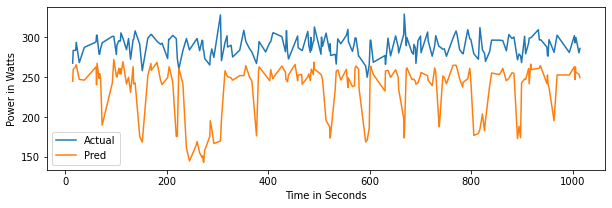

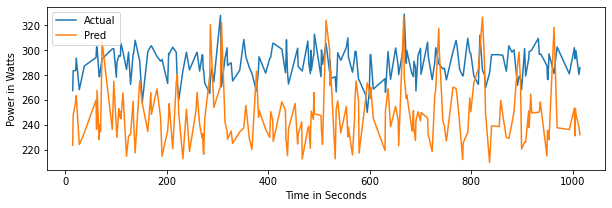

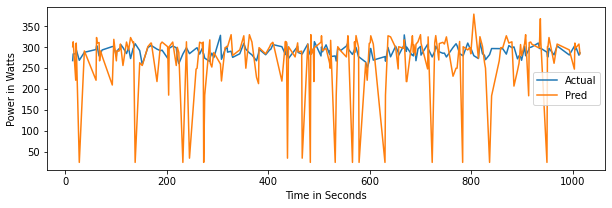

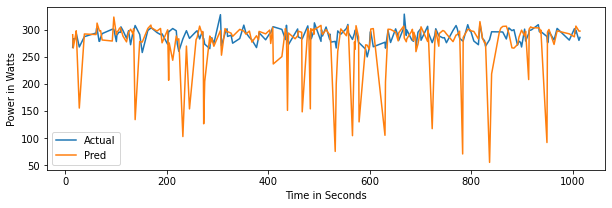

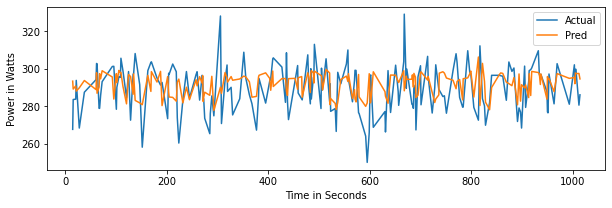

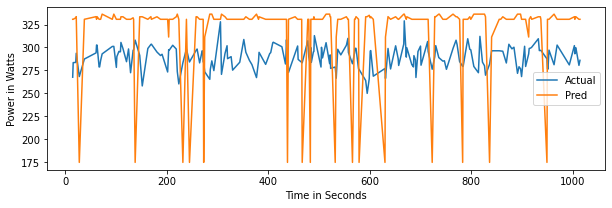

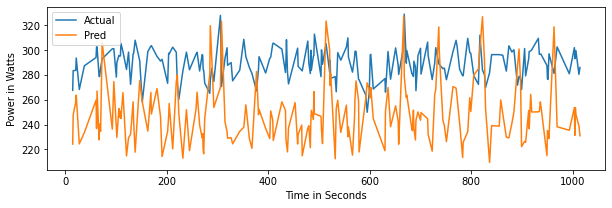

53.37
18.41
12.54
0
44.73
15.35
12.54
0
44.49
15.58
12.54
0
26.03
9.13
12.54
0
10.29
3.59
12.54
0
46.39
16.26
12.54
0
44.66
15.33
12.54
0
[0.17812778 0.15212716 0.11744958 0.12121076 0.00536319 0.00480139
 0.14784895 0.15080905 0.12226215]
1 [169.87867051]


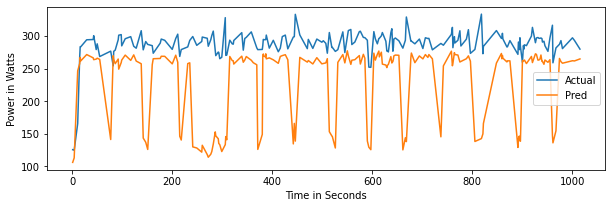

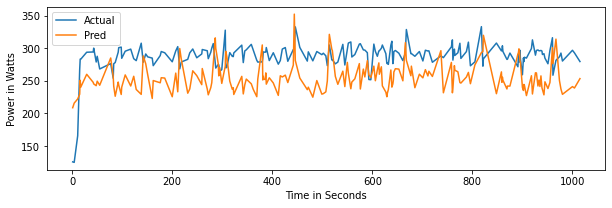

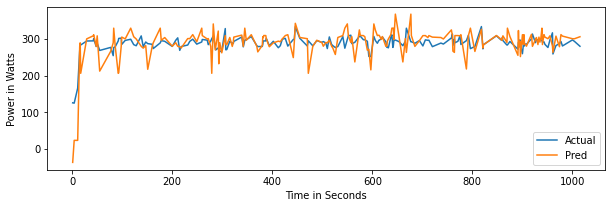

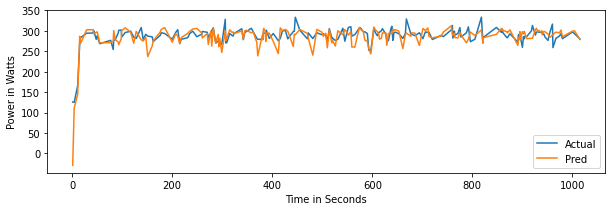

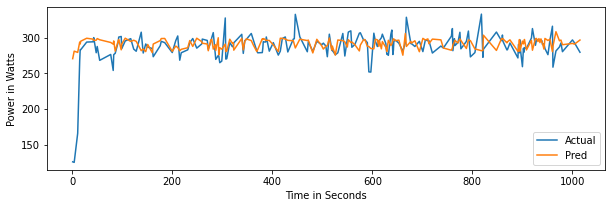

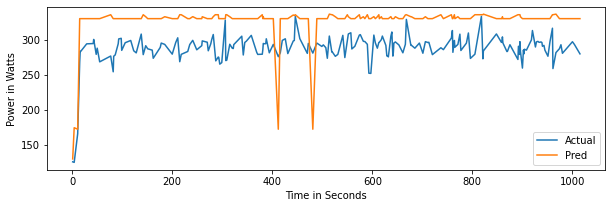

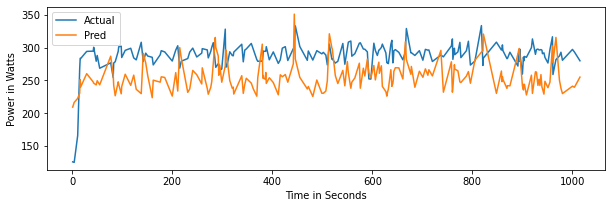

112.28999999999999
38.91
35.05
0
83.72
29.15
35.05
0
64.83
23.39
35.05
0
38.89
13.97
35.05
0
22.61
8.67
35.05
0
87.95
30.96
35.05
0
83.63
29.130000000000003
35.05
0
[0.16568167 0.15514118 0.1493904  0.16286198 0.00412144 0.00398653
 0.09510176 0.17109326 0.09262178]
2 [170.03500507]


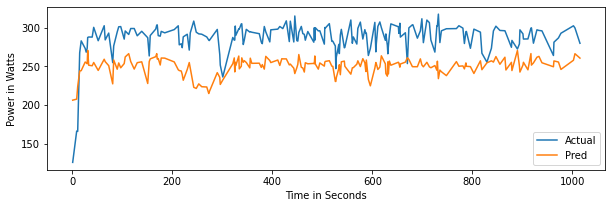

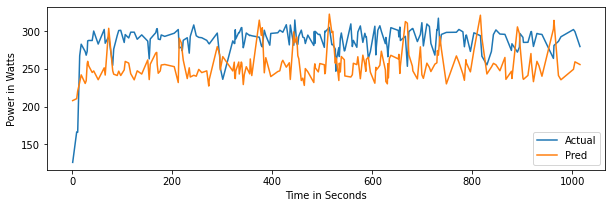

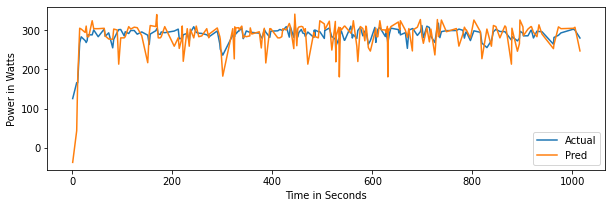

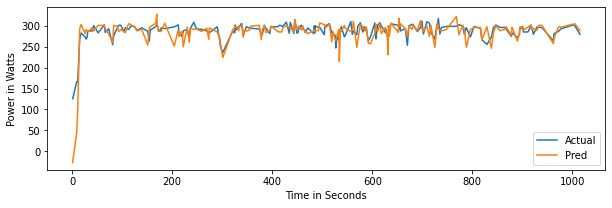

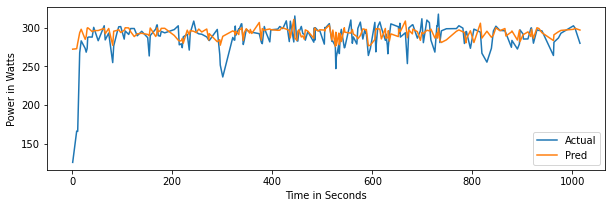

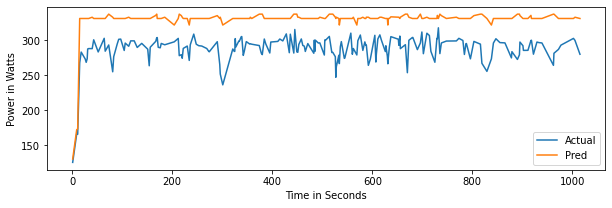

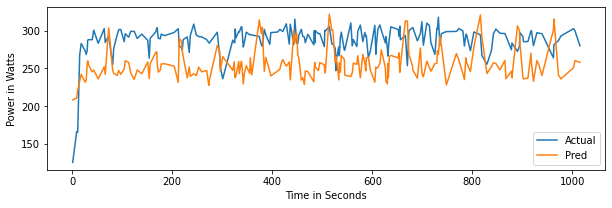

151.45
52.599999999999994
56.28
0
122.00999999999999
42.58
56.28
0
85.64
31.21
56.28
0
51.61
18.990000000000002
56.28
0
34.68
13.530000000000001
56.28
0
129.75
45.69
56.28
0
121.88999999999999
42.550000000000004
56.28
0
[0.3375194  0.13063727 0.12462158 0.08833192 0.00381963 0.00363896
 0.09613046 0.12556277 0.08973801]
3 [169.57313545]


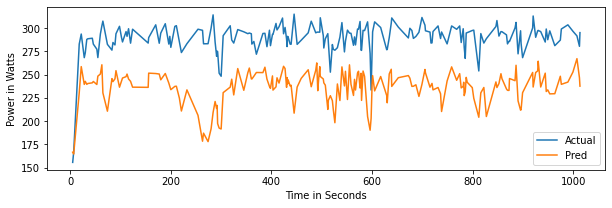

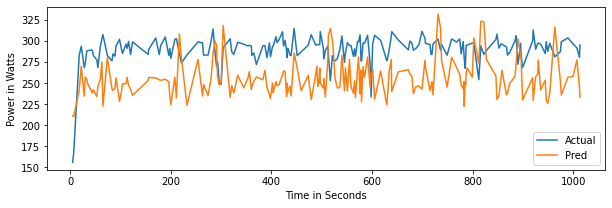

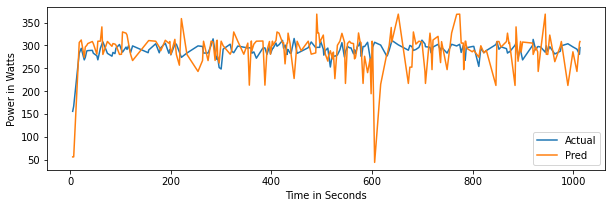

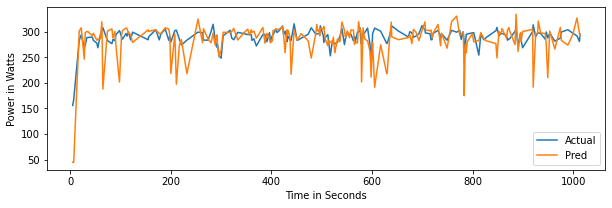

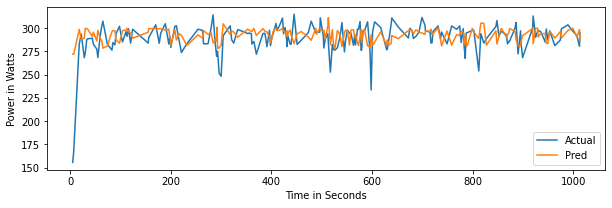

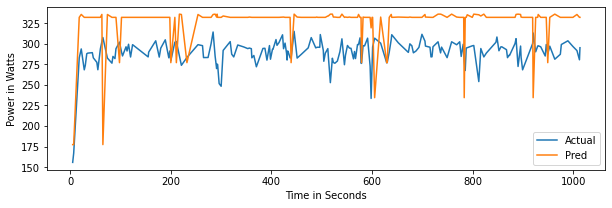

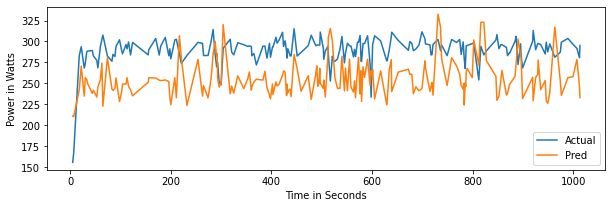

204.01999999999998
70.66999999999999
73.79
0
160.91
56.04
73.79
0
111.69
40.45
73.79
0
70.39
25.770000000000003
73.79
0
45.99
17.78
73.79
0
171.18
60.17
73.79
0
160.73
55.99
73.79
0
[0.34296816 0.09790295 0.10333782 0.09032823 0.00442828 0.00375629
 0.12973608 0.13699134 0.09055084]
4 [170.10437776]


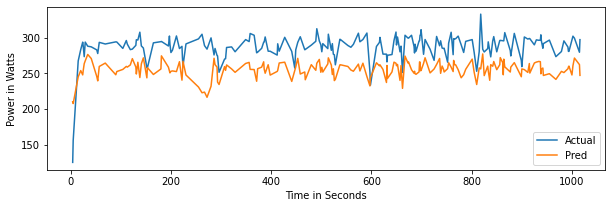

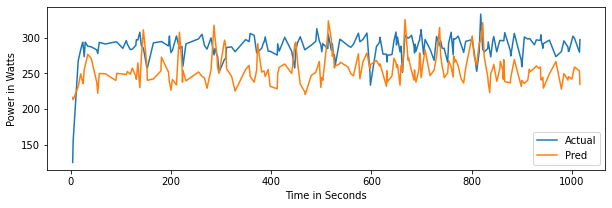

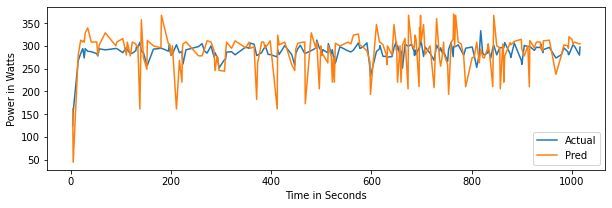

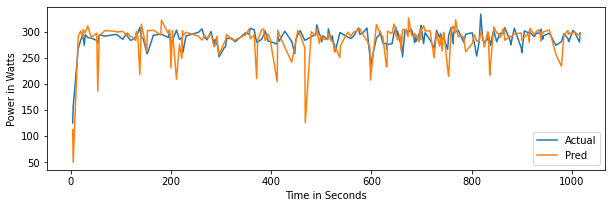

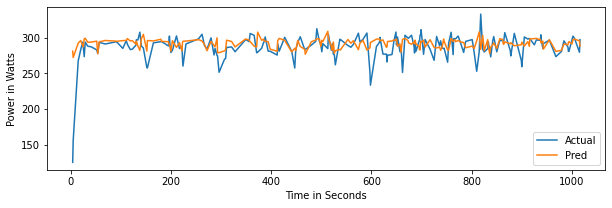

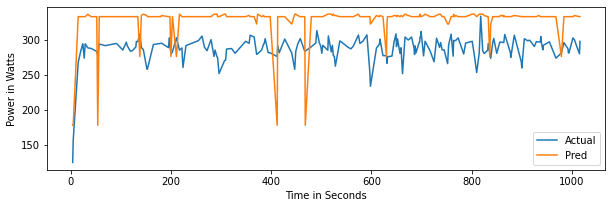

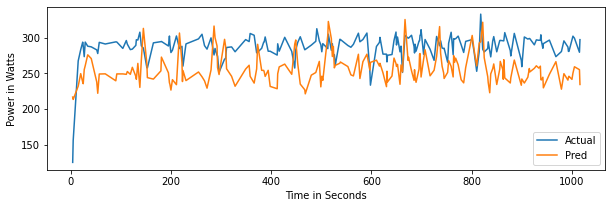

237.07
82.26999999999998
93.49000000000001
0
197.25
68.82
93.49000000000001
0
138.32999999999998
49.95
93.49000000000001
0
86.81
31.720000000000002
93.49000000000001
0
57.68
22.44
93.49000000000001
0
215.61
75.97
93.49000000000001
0
197.02999999999997
68.76
93.49000000000001
0


In [178]:
from sklearn.utils import shuffle
res2 = pd.DataFrame()

for x in range(5):
    shuf = shuffle(df_train)
    train = shuf.sample(n=int(len(df_train)*0.8))


    rest = df_train.drop(train.index)
    test1 = df_app1.drop(train.index)
    test2 = df_app2.drop(train.index)
    svr_i = 0
    beta_0 = 0
    preds_1 = {}
    df_t = {}

    p_flag = True
    b_flag = True
    r_flag = True
    preds1 = {}
    df_idle = pd.read_csv("datasets/final-idlerun.csv")
    df_idle = df_idle.loc[:, ~df_idle.columns.str.contains('^Unnamed')]
    p_idle = np.mean(df_idle.power)
    df_mean = []

    for i in df_idle:
        df_mean.append(np.mean(df_idle[i]))
    #         print(np.mean(df_idle[i]))
    #     print(df_mean)
    if p_flag == True:

        train.power -= p_idle
    if r_flag == True:
        colNames = ["LLC-load-misses", "LLC-loads", "LLC-store-misses", "LLC-stores", "blocks", "bytes", "cycles", "instructions", "ref-cycles"]
        i = 0
        for cols in colNames:
            train[cols] -= df_mean[i]
            test1[cols] -= df_mean[i]
            test2[cols] -= df_mean[i]
            i += 1

    svr_i = 0
    beta_0 = 0
    preds_2 = {}
    df_t = {}
    preds2 = {}

    # models = ['Linear Regression', 'Random Forest', 'SVR']
    models = ['NN', 'Linear Regression', 'Decision Tree', 'Random Forest', 'SVR', 'XGBoost', 'Lasso']
#     models = ['Linear Regression', 'XGBoost']
#     models = ['XGBoost']
    results = {}
    oldY=test1.power
    std_Y=np.std(test1.power)
    avg_pow = np.max(test1.power)
    

    run_models1()
    run_models2()
    calc(x)
    for i, row in res2.T.iterrows():
        print(row['MAE'])
        print(row['MAPE'])
        print(row['STD'])
        print(0)
    

In [179]:
res2 /= 5
res2 = res2.round(2)
res2

,NN,Linear Regression,Decision Tree,Random Forest,SVR,XGBoost,Lasso
MAE,47.41,39.45,27.67,17.36,11.54,43.12,39.41
MAPE,16.45,13.76,9.99,6.34,4.49,15.19,13.75
STD,18.70,18.70,18.70,18.70,18.70,18.70,18.70


In [180]:
for i, row in res2.T.iterrows():
        print(row['MAE'])
        print(row['MAPE'])
        print(row['STD'])
        print(0)

47.41
16.45
18.7
0
39.45
13.76
18.7
0
27.67
9.99
18.7
0
17.36
6.34
18.7
0
11.54
4.49
18.7
0
43.12
15.19
18.7
0
39.41
13.75
18.7
0


In [613]:
len(test1)

249

In [144]:
def run_models1():
    global beta_0
    global svr_i
#     ss = StandardScaler(with_std=False)
    ss = MinMaxScaler()
    sc_X = ss.fit_transform(train)
    sc_X = pd.DataFrame(data=sc_X)
    # ss = StandardScaler()
    sc_Y = ss.transform(test1)
    sc_Y = pd.DataFrame(data=sc_Y)

    X1 = sc_X.iloc[:, np.r_[:4,4:9]].values
    y1 = train.iloc[:, -1:].values
    X2 = sc_Y.iloc[:, np.r_[:4,4:9]].values
    y2 = test1.iloc[:, -1:].values

    std_=np.std(train.power)
    mean_=np.mean(train.power)
    def destandardize(var):
        return var
    #         newVar=var+mean_
    #         return newVar


    model = MLPRegressor(hidden_layer_sizes= (512,16,16,),learning_rate='constant', alpha= 0.0001, learning_rate_init= 0.1, max_iter= 10000, activation= 'relu')
    model.fit(X1, y1)
    y_pred = model.predict(X2)
    y_pred=destandardize(y_pred)
    preds1['NN'] = y_pred.flatten()
    
    ss = StandardScaler(with_std=False)
#     ss = MinMaxScaler()
    sc_X = ss.fit_transform(train)
    sc_X = pd.DataFrame(data=sc_X)
    # ss = StandardScaler()
    sc_Y = ss.transform(test1)
    sc_Y = pd.DataFrame(data=sc_Y)

    X1 = sc_X.iloc[:, np.r_[:4,4:9]].values
    y1 = train.iloc[:, -1:].values
    X2 = sc_Y.iloc[:, np.r_[:4,4:9]].values
    y2 = test1.iloc[:, -1:].values

    model = LinearRegression(fit_intercept=b_flag)
    model.fit(X1, y1)
    beta_0 = model.intercept_
    y_pred = model.predict(X2)
#     print(beta_0)
    y_pred=destandardize(y_pred)
    preds1['Linear Regression'] = y_pred.flatten()

    model = DecisionTreeRegressor()
    model.fit(X1, y1)
    y_pred = model.predict(X2)
    y_pred=destandardize(y_pred)
    preds1['Decision Tree'] = y_pred.flatten()

    model = RandomForestRegressor()
    model.fit(X1, y1)
#     print(model.feature_importances_)
    #     perm = permutation_importance(model, X1, y1, n_repeats=10, random_state=0)
    #     print(perm.importances_mean)
    y_pred = model.predict(X2)
    y_pred=destandardize(y_pred)
    preds1['Random Forest'] = y_pred.flatten()

    model = SVR()
    model.fit(X1, y1)
    #     perm = permutation_importance(model, X1, y1, n_repeats=10, random_state=0)
    #     print(perm.importances_mean)
    svr_i = model.intercept_
#     print("SVR intercept:", model.intercept_)
    y_pred = model.predict(X2)
    y_pred=destandardize(y_pred)
    preds1['SVR'] = y_pred.flatten()

    model = XGBRegressor(n_estimators=1000,max_depth=3,eta=0.001)
    model.fit(X1, y1)
    y_pred = model.predict(X2)
    y_pred=destandardize(y_pred)
    preds1['XGBoost'] = y_pred.flatten()

    model = Lasso(alpha=0.1)
    model.fit(X1, y1)
    y_pred = model.predict(X2)
    y_pred=destandardize(y_pred)
    preds1['Lasso'] = y_pred.flatten()


In [143]:
def run_models2():
    global beta_0
    global svr_i
#     ss = StandardScaler(with_std=False)
    ss = MinMaxScaler()
    sc_X = ss.fit_transform(train)
    sc_X = pd.DataFrame(data=sc_X)
    # ss = StandardScaler()
    sc_Y = ss.transform(test2)
    sc_Y = pd.DataFrame(data=sc_Y)

    X1 = sc_X.iloc[:, np.r_[:4,4:9]].values
    y1 = train.iloc[:, -1:].values
    X2 = sc_Y.iloc[:, np.r_[:4,4:9]].values
    y2 = test2.iloc[:, -1:].values

    std_=np.std(train.power)
    mean_=np.mean(train.power)
    def destandardize(var):
        return var
    #         newVar=var+mean_
    #         return newVar


    model = MLPRegressor(hidden_layer_sizes= (512,16,16,),learning_rate='constant', alpha= 0.0001, learning_rate_init= 0.1, max_iter= 10000, activation= 'relu')
    model.fit(X1, y1)
    y_pred = model.predict(X2)
    y_pred=destandardize(y_pred)
    preds2['NN'] = y_pred.flatten()
    
    ss = StandardScaler(with_std=False)
#     ss = MinMaxScaler()
    sc_X = ss.fit_transform(train)
    sc_X = pd.DataFrame(data=sc_X)
    # ss = StandardScaler()
    sc_Y = ss.transform(test1)
    sc_Y = pd.DataFrame(data=sc_Y)

    X1 = sc_X.iloc[:, np.r_[:4,4:9]].values
    y1 = train.iloc[:, -1:].values
    X2 = sc_Y.iloc[:, np.r_[:4,4:9]].values
    y2 = test1.iloc[:, -1:].values

    model = LinearRegression(fit_intercept=b_flag)
    model.fit(X1, y1)
    beta_0 = model.intercept_
    y_pred = model.predict(X2)
#     print(beta_0)
    y_pred=destandardize(y_pred)
    preds2['Linear Regression'] = y_pred.flatten()

    model = DecisionTreeRegressor()
    model.fit(X1, y1)
    y_pred = model.predict(X2)
    y_pred=destandardize(y_pred)
    preds2['Decision Tree'] = y_pred.flatten()

    model = RandomForestRegressor()
    model.fit(X1, y1)
    print(model.feature_importances_)
    #     perm = permutation_importance(model, X1, y1, n_repeats=10, random_state=0)
    #     print(perm.importances_mean)
    y_pred = model.predict(X2)
    y_pred=destandardize(y_pred)
    preds2['Random Forest'] = y_pred.flatten()

    model = SVR()
    model.fit(X1, y1)
    #     perm = permutation_importance(model, X1, y1, n_repeats=10, random_state=0)
    #     print(perm.importances_mean)
    svr_i = model.intercept_
#     print("SVR intercept:", model.intercept_)
    y_pred = model.predict(X2)
    y_pred=destandardize(y_pred)
    preds2['SVR'] = y_pred.flatten()

    model = XGBRegressor(n_estimators=1000,max_depth=3,eta=0.001)
    model.fit(X1, y1)
    y_pred = model.predict(X2)
    y_pred=destandardize(y_pred)
    preds2['XGBoost'] = y_pred.flatten()

    model = Lasso(alpha=0.1)
    model.fit(X1, y1)
    y_pred = model.predict(X2)
    y_pred=destandardize(y_pred)
    preds2['Lasso'] = y_pred.flatten()


In [142]:

def calc(i):
    print(i, beta_0)
    global std_Y
    global res2
    for m in models:
        l = min(len(preds1[m]), len(preds2[m]))
    #     print(l)
    #         l = len(preds_1[t][m])
    #         l = 1100
        p1 = preds1[m][:l]
        p2 = preds2[m][:l]
    #         total_pred = (p1)
        total_pred = (p1+p2) if p_flag == False else (p1 + p2 + p_idle)
    #         total_pred -= p_idle
        if m == 'SVR':
            total_pred -= svr_i
        elif m == 'XGBoost' : pass
        else:
            total_pred -= beta_0

        mae = mean_absolute_error(oldY[:l], total_pred)
        mape = mean_absolute_percentage_error(oldY[:l], total_pred)
        mae = round(mae, 2)
        mape = round((mape*100), 2)
        std_Y = round(std_Y, 2)
    #     print(m)
    #     print("Mean absolute error:", mae)
    #     print("Mean absolute percentage error:", mape)
    #     print("Standard deviation of test set:", std_Y)
        # add results to dictionary
        results[m] = [mae, mape, std_Y]
    #     print((total_pred))
        df_plot = pd.DataFrame({'Actual': oldY[:l], 'Pred': total_pred})
        plt.figure(figsize=(10, 3))
        plt.plot(df_plot)
        plt.legend(df_plot.columns)
        plt.ylabel("Power in Watts")
        plt.xlabel("Time in Seconds")
        plt.show()

    results_df = pd.DataFrame(results, index=['MAE', 'MAPE', 'STD'])
    res = results_df
    if i == 0:
        res2 = res
    else:
        res2 += res

In [620]:
for i, row in results_df.T.iterrows():
        print(row['MAE'])
        print(row['MAPE'])
        print(row['STD'])
        print(0)

912579.73
305762.61
6.01
0
4.6
1.57
6.01
0
6.55
2.24
6.01
0
4.21
1.43
6.01
0
5.11
1.76
6.01
0
128.51
43.79
6.01
0
4.6
1.57
6.01
0


In [37]:
res

NameError: name 'res' is not defined

In [549]:
test1

,LLC-load-misses,LLC-loads,LLC-store-misses,LLC-stores,blocks,bytes,cycles,instructions,ref-cycles,pkg_pwr,ram_pwr,power
4,1.624712e+08,1.419288e+09,5.202928e+07,1.808462e+08,-1255.862347,-6.430015e+05,1.377440e+11,1.234536e+11,1.381966e+11,190.57,23.16,280.5
9,2.142973e+08,1.232593e+09,5.020227e+07,1.416765e+08,-3815.862347,-1.953722e+06,1.497764e+11,1.124463e+11,1.492070e+11,178.87,24.20,265.9
12,1.315569e+08,5.054827e+08,1.844144e+07,7.238322e+07,-3815.862347,-1.953722e+06,7.756322e+10,7.449312e+10,7.758372e+10,158.44,21.02,257.4
17,7.883722e+07,4.315445e+08,9.150920e+06,4.838442e+07,-3815.862347,-1.953722e+06,7.553934e+10,6.579548e+10,7.715228e+10,162.60,20.35,232.3
19,3.778085e+08,1.053205e+09,1.477762e+07,9.595627e+07,-3815.862347,-1.953722e+06,1.705880e+11,9.806219e+10,1.706748e+11,193.69,25.11,274.7
...,...,...,...,...,...,...,...,...,...,...,...,...
1020,1.971470e+08,1.157990e+09,4.141889e+07,1.322712e+08,-3815.862347,-1.953722e+06,1.438105e+11,1.138741e+11,1.438959e+11,174.29,26.45,276.8
1022,1.363410e+08,1.072627e+09,2.769803e+07,1.413983e+08,-3807.862347,-1.949626e+06,1.124476e+11,6.488953e+10,1.130535e+11,159.53,22.83,256.2
1024,1.534665e+08,1.108202e+09,3.678828e+07,1.942967e+08,-3815.862347,-1.953722e+06,1.335008e+11,6.318835e+10,1.338602e+11,183.48,23.77,250.2
1029,2.522012e+08,8.019702e+08,1.187163e+07,7.702062e+07,-3815.862347,-1.953722e+06,1.331066e+11,8.335964e+10,1.327205e+11,178.41,20.21,282.6


In [550]:
test2

,LLC-load-misses,LLC-loads,LLC-store-misses,LLC-stores,blocks,bytes,cycles,instructions,ref-cycles,pkg_pwr,ram_pwr,power
4,-61957.642559,-1.937480e+06,-11282.240893,-118360.274096,-3815.862347,-1.953722e+06,8.867497e+09,2.135225e+10,8.776824e+09,190.57,23.16,280.5
9,-38735.642559,-1.923414e+06,-8976.240893,-115054.274096,-3815.862347,-1.953722e+06,9.103687e+09,2.252084e+10,8.976531e+09,178.87,24.20,265.9
12,-62509.642559,-1.953468e+06,-14262.240893,-119386.274096,-3815.862347,-1.953722e+06,8.125390e+09,1.863012e+10,8.031199e+09,158.44,21.02,257.4
17,-88349.642559,-1.976142e+06,-16538.240893,-119966.274096,-3815.862347,-1.953722e+06,8.448583e+09,2.157698e+10,8.425371e+09,162.60,20.35,232.3
19,-25793.642559,-1.927668e+06,-10272.240893,-117146.274096,-3815.862347,-1.953722e+06,8.632705e+09,2.078396e+10,8.575433e+09,193.69,25.11,274.7
...,...,...,...,...,...,...,...,...,...,...,...,...
1020,-33277.642559,-1.929422e+06,-11698.240893,-118954.274096,-3815.862347,-1.953722e+06,9.116591e+09,2.211402e+10,9.017437e+09,174.29,26.45,276.8
1022,-37881.642559,-1.959758e+06,-10950.240893,-120828.274096,-3815.862347,-1.953722e+06,8.532913e+09,2.075906e+10,8.450265e+09,159.53,22.83,256.2
1024,-34413.642559,-1.949624e+06,-11722.240893,-121180.274096,-3815.862347,-1.953722e+06,8.501591e+09,2.018595e+10,8.411485e+09,183.48,23.77,250.2
1029,-58823.642559,-1.989854e+06,-16214.240893,-125738.274096,-3815.862347,-1.953722e+06,6.538546e+09,1.583377e+10,6.429252e+09,178.41,20.21,282.6


In [81]:
l

2781

length of whole dataset power 13905


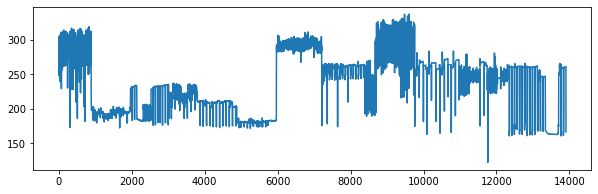

In [142]:
print('length of whole dataset power', len(df_train.power))
plt.figure(figsize=(10, 3))
plt.plot(df_train.power)

length of test power 2781


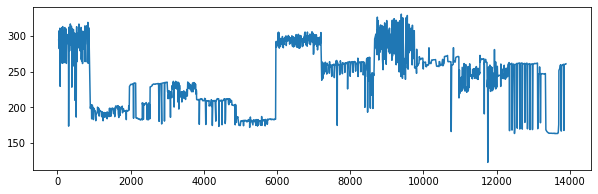

In [143]:
print('length of test power', len(test1.power))
plt.figure(figsize=(10, 3))
plt.plot(test1.power)

length of predicted power 2781


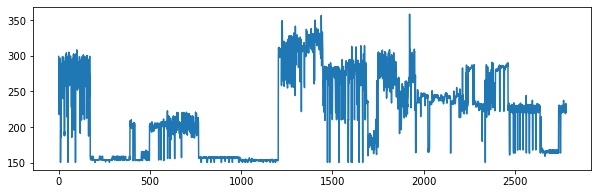

In [144]:
print('length of predicted power', len(total_pred))
plt.figure(figsize=(10, 3))
plt.plot(total_pred)

In [135]:
len(df_plot)

2781

In [118]:
oy1 = oldY

In [119]:
oy1

5        297.1
6        296.7
10       253.5
24       292.0
27       292.7
         ...  
13888    260.7
13894    260.8
13898    260.9
13900    260.9
13901    260.9
Name: power, Length: 2781, dtype: float64

In [128]:
oldY

33       294.4
35       291.9
36       291.3
37       284.8
39       307.1
         ...  
13875    260.5
13877    260.4
13891    260.7
13896    260.8
13897    260.8
Name: power, Length: 2781, dtype: float64

In [145]:
test1

,LLC-load-misses,LLC-loads,LLC-store-misses,LLC-stores,blocks,bytes,cycles,instructions,ref-cycles,pkg_pwr,ram_pwr,power
33,4.187698e+07,6.992203e+07,3.853058e+05,5.785517e+05,-3815.862347,-1.953722e+06,7.188723e+10,5.218945e+10,7.244006e+10,195.03,31.28,294.4
35,2.333664e+07,4.220398e+07,2.422898e+05,3.923297e+05,-3815.862347,-1.953722e+06,4.444953e+10,3.368677e+10,4.449936e+10,182.96,29.12,291.9
36,1.735124e+07,2.726307e+07,1.733748e+05,1.187607e+05,-3815.862347,-1.953722e+06,3.149107e+10,2.115572e+10,3.129925e+10,184.60,31.70,291.3
37,9.096970e+06,1.638885e+07,1.382148e+05,8.142787e+05,-3815.862347,-1.953722e+06,1.029492e+10,6.818750e+09,1.039307e+10,180.26,32.68,284.8
39,1.741149e+08,3.438673e+08,1.867126e+07,2.914348e+07,-3815.862347,-1.953722e+06,7.513723e+10,6.838008e+10,7.505375e+10,188.75,28.35,307.1
...,...,...,...,...,...,...,...,...,...,...,...,...
13875,3.849124e+07,8.100692e+08,2.130404e+07,1.541918e+08,-3815.862347,-1.953722e+06,2.128026e+11,9.727547e+10,2.128936e+11,178.75,15.61,260.5
13877,3.089701e+07,6.588102e+08,1.763062e+07,1.232631e+08,-3815.862347,-1.953722e+06,1.687495e+11,7.636869e+10,1.687718e+11,178.78,15.56,260.4
13891,3.405394e+07,6.421775e+08,1.824672e+07,1.271522e+08,-3815.862347,-1.953722e+06,1.688652e+11,7.675687e+10,1.691495e+11,178.83,15.59,260.7
13896,3.745791e+07,8.956998e+08,2.122837e+07,1.674763e+08,-3815.862347,-1.953722e+06,2.296538e+11,1.048599e+11,2.296019e+11,138.15,14.72,260.8


In [294]:
df_train

,LLC-load-misses,LLC-loads,LLC-store-misses,LLC-stores,blocks,bytes,cycles,instructions,ref-cycles,pkg_pwr,ram_pwr,power
0,17299103,159338206,7574915,22183020,0,0,72422737831,34560712620,68203390934,197.05,20.19,290.7
1,44895187,339631931,13626775,44631665,5232,2678784,91971702878,47953971581,93136522012,193.30,20.89,290.7
2,29707710,196273622,6581946,28878837,4448,2277376,70794145768,37873102961,68176451219,193.39,21.60,290.8
3,41018171,210943150,11670004,39424771,4520,2314240,85960746414,46165293138,85188560017,189.26,21.63,290.9
4,31688165,178039209,9465796,35468056,2656,1359872,87867391698,44917775652,88645802422,188.50,21.84,291.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1237,100525975,270869536,3629086,27649737,0,0,33866330407,27400310539,33742221125,193.28,21.73,296.9
1238,4085010,50679007,3780285,16491772,1888,966656,51918565997,22333879023,52079408290,190.74,21.93,283.2
1239,32675110,256976994,3047271,26633505,0,0,27130697876,34227420144,27184838989,189.32,21.92,283.7
1240,10873293,123986782,9618756,34847867,1608,823296,72611509964,35835784114,72672969967,192.17,20.84,291.1


In [295]:
df_all

{'exp1':       LLC-load-misses  LLC-loads  LLC-store-misses  LLC-stores  blocks  \
 0           122410436  444862458          40117084   143116093       0   
 1           115287742  454730152          45808816   180793005     864   
 2            99121075  378716387          40716349   133959348       0   
 3            59614078  233177896          24338854    89626059     424   
 4           103606864  358998328          40463243   117145277       0   
 ...               ...        ...               ...         ...     ...   
 1205        119246766  411733069          40894690   158797054     104   
 1206         92857635  309954162          24330304   107739758       8   
 1207        115739401  407108539          43394383   158282851       0   
 1208        129123707  456744898          42794984   161991068       0   
 1209        114409696  411023077          39057128   162664847       0   
 
        bytes        cycles  instructions    ref-cycles  pkg_pwr  ram_pwr  \
 0          0

In [621]:
a = {}
a[0] = [1,2,3]
a[0] += [1,2,3]
a[0]

[1, 2, 3, 1, 2, 3]

In [624]:
res2 = res + res

In [625]:
res2

,NN,Linear Regression,Decision Tree,Random Forest,SVR,XGBoost,Lasso
MAE,1825159.46,9.20,13.10,8.42,10.22,257.02,9.20
MAPE,611525.22,3.14,4.48,2.86,3.52,87.58,3.14
STD,12.02,12.02,12.02,12.02,12.02,12.02,12.02


In [626]:
res

,NN,Linear Regression,Decision Tree,Random Forest,SVR,XGBoost,Lasso
MAE,912579.73,4.60,6.55,4.21,5.11,128.51,4.60
MAPE,305762.61,1.57,2.24,1.43,1.76,43.79,1.57
STD,6.01,6.01,6.01,6.01,6.01,6.01,6.01


In [627]:
res2 /= 10

In [650]:
res2 = pd.DataFrame()

In [651]:
res2 = res

In [652]:
res2

,NN,Linear Regression,Decision Tree,Random Forest,SVR,XGBoost,Lasso
MAE,912579.73,4.60,6.55,4.21,5.11,128.51,4.60
MAPE,305762.61,1.57,2.24,1.43,1.76,43.79,1.57
STD,6.01,6.01,6.01,6.01,6.01,6.01,6.01


In [656]:
res2 += res

In [657]:
res2

,NN,Linear Regression,Decision Tree,Random Forest,SVR,XGBoost,Lasso
MAE,3650318.92,18.40,26.20,16.84,20.44,514.04,18.40
MAPE,1223050.44,6.28,8.96,5.72,7.04,175.16,6.28
STD,24.04,24.04,24.04,24.04,24.04,24.04,24.04


In [655]:
res

,NN,Linear Regression,Decision Tree,Random Forest,SVR,XGBoost,Lasso
MAE,1825159.46,9.20,13.10,8.42,10.22,257.02,9.20
MAPE,611525.22,3.14,4.48,2.86,3.52,87.58,3.14
STD,12.02,12.02,12.02,12.02,12.02,12.02,12.02
